 # Imbalance classfication problem -- (Code Challenge)

 The jupyter notebook includes all related algorithms and results to load dataset, visualize principal conponents, and then, prediting the data's label using Logistic regression and a designed neural network.

 Imbalanced classfication problem (Rare event prediction, Extreme event prediction, Severe class imbalance) refers to a class distribution that is inherently not balanced. As we will see in the classes distribution that they are not balanced.
 
 There are perhaps two main groups of causes for the imbalance we may want to consider; they are data sampling and properties of the domain. Errors may have been made when collecting the observations. One type of error might have been applying the wrong class labels to many examples. Alternately, the processes or systems from which examples were collected may have been damaged or impaired to cause the imbalance.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


NUM_PCA_COMPONENT: int = 2
PCA_VARIANCE: np.float = 0.95
NUM_LDA_COMPONENT: int = 2


def get_data() -> List[pd.DataFrame]:
    input_train_data = pd.read_csv('train_x.csv')
    output_train_data = pd.read_csv('train_y.csv')
    input_test_data = pd.read_csv('test_x.csv')
    return input_train_data, output_train_data, input_test_data


def standardize_data(input_train_data: pd.DataFrame, input_test_data: pd.DataFrame) -> List[np.ndarray]:
    in_train = StandardScaler().fit_transform(input_train_data)
    in_test = StandardScaler().fit_transform(input_test_data)
    return in_train, in_test


def project_data(data: pd.DataFrame) -> pd.DataFrame:
    pca = PCA(n_components=NUM_PCA_COMPONENT)
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents,
                                columns = ['principal component 1', 'principal component 2'])
    return principalDf, pca


def visualize_data_pca(final_df: pd.DataFrame) -> plt.plot:
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [1, 0]
    colors = ['g', 'r']
    for target, color in zip(targets,colors):
        indicesToKeep = final_df['target'] == target
        ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'],
                    final_df.loc[indicesToKeep, 'principal component 2'],
                    c = color,
                    s = 50)
    ax.legend(targets)
    ax.grid()


def visualize_data_lda(input_train_data: pd.DataFrame, out_train_data: pd.DataFrame) -> plt.plot:
    y = out_train_data.target
    X = input_train_data
    y.loc[4001] = y.loc[2] + 2
    X.loc[4001] = input_train_data.loc[0] * 10

    lda = LinearDiscriminantAnalysis(n_components=NUM_LDA_COMPONENT)
    # X_r = lda.fit(X, y).transform(X)
    X_lda = lda.fit_transform(X, y)
    colors = ['navy', 'red']
    target_names = ['False', 'True']
    plt.figure()
    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA of data')
    plt.xlabel('LDA 1')
    plt.ylabel('LDA 2')
    plt.grid()
    plt.show()
    print(f"The LDA variance ratios are {lda.explained_variance_ratio_}")

# Examining the possibility of exisiting imbalance in the dataset

In this step, the train data and test data will be loaded, then, we should examine the number of data in each classes to evaluate the possibility of existing imbalance between classes.

Slight Imbalance. An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).

Severe Imbalance. An imbalanced classification problem where the distribution of examples is uneven by a large amount in the training dataset (e.g. 1:100 or more).


In [11]:
input_train_data, out_train_data, input_test_data = get_data()
data = input_train_data.copy()
data['target'] = out_train_data['target']
classes_ratio = (len(data[data['target'] == 1]) / len(data[data['target'] == 0]))
if classes_ratio <= 0.6:
    print("There exists severe imablance!!")
if classes_ratio >= 0.6 and classes_ratio <= 0.95:
    print("There exists slight imbalance!!")

There exists severe imablance!!


# Visualize Principal Components

The dataset should be normalized in order to avoid any problem in not only learning phase but also in computing principal components. Eventually, they data will be shown by considering principal components.

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data.

Here we plot the different samples on the 2 first principal components.

The pca's variance ratio is [0.18547859 0.0773893 ]


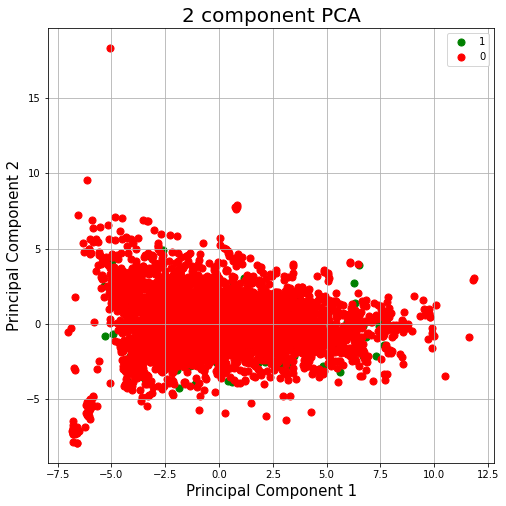

In [4]:
in_train, in_test = standardize_data(input_train_data, input_test_data)
principal_df, pca = project_data(in_train)
final_df = pd.concat([principal_df, out_train_data[['target']]], axis = 1)
visualize_data_pca(final_df)
print(f"The pca's variance ratio is {pca.explained_variance_ratio_}")

# Applying PCA to the Data
Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data.

In [3]:
pca = PCA(PCA_VARIANCE)
pca.fit(in_train)
print(f"Num of principal components is {pca.n_components_}")
train_ = pca.transform(in_train)
test_ = pca.transform(in_test)

Num of principal components is 35


# Linear Discriminant Analysis (LDA)
LDA tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.


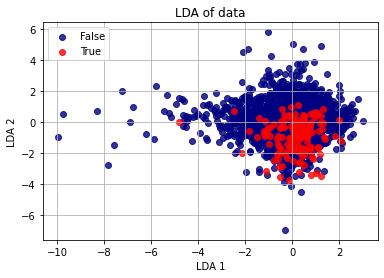

The LDA variance ratios are [0.99853512 0.00146488]


In [4]:
visualize_data_lda(input_train_data, out_train_data)

# Logistic Regression
The fitting problem for train data will be computed by using Logistic Regression in this step. Then, the fitting accuracy will be computed for the seperated test data.

accuracy (fraction of correct predictions): correct predictions / total number of data points

In [5]:
train_1, test_1, train_lbl, test_lbl = train_test_split(train_, out_train_data.target, test_size=1/8.0, random_state=0)
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_1, train_lbl)
score = logisticRegr.score(test_1, test_lbl)
# print(f"The prediction score is {score}")
print("The prediction score on test: " + str(logisticRegr.score(test_1, test_lbl)))
print("The prediction score on train: "+ str(logisticRegr.score(train_1, train_lbl)))

The prediction score on test: 0.956
The prediction score on train: 0.9602857142857143


# Predcit data
The target for the test data will be calculated using the obtained parameters in LogisticRegression. Then, the result is saved as a CSV file.

In [6]:
predicted_test = logisticRegr.predict(test_)
test_y = pd.DataFrame(predicted_test, columns=['target'])
test_y['Unnamed: 0'] = out_train_data['Unnamed: 0']
test_y = test_y[['Unnamed: 0', 'target']]
test_y.to_csv('test_y.csv')
test_y.head(8) 

,Unnamed: 0,target
0,3915,0.0
1,4339,0.0
2,3422,0.0
3,5624,0.0
4,886,0.0
5,5936,0.0
6,3179,0.0
7,3969,0.0


# Neural Network (Deep Learning)
Deep learning uses an artificial neural network that uses multiple layers to progressively extract higher level features from the training data. We are using a simple three-layer network without any optimisation, except the usage of a small validation dataset. 



In [7]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics


NUM_VALIDATION: int = 200
NUM_CLASSES: int = 2

train_1, test_1, train_lbl, test_lbl = train_test_split(train_, out_train_data.target, test_size=1/8.0, random_state=0)
x_validation = train_1[:NUM_VALIDATION]
x_partial_train = train_1[NUM_VALIDATION:]
y_validation = train_lbl[:NUM_VALIDATION]
y_partial_train = train_lbl[NUM_VALIDATION:]

model = models.Sequential()
# model.add(keras.Input(shape=(3300, 35)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_partial_train, y_partial_train, epochs=4, batch_size=32, validation_data=(x_validation, y_validation))

print(140 * '=')
print("score on test: " + str(model.evaluate(test_1, test_lbl)[1]))
print("score on train: "+ str(model.evaluate(train_1, train_lbl)[1]))

Epoch 1/4
104/104 [==============================] - 1s 4ms/step - loss: 0.4338 - accuracy: 0.8445 - val_loss: 0.2442 - val_accuracy: 0.9400
Epoch 2/4
104/104 [==============================] - 0s 843us/step - loss: 0.1727 - accuracy: 0.9682 - val_loss: 0.2319 - val_accuracy: 0.9400
Epoch 3/4
104/104 [==============================] - 0s 791us/step - loss: 0.1619 - accuracy: 0.9626 - val_loss: 0.2306 - val_accuracy: 0.9400
Epoch 4/4
16/16 [==============================] - 0s 480us/step - loss: 0.1683 - accuracy: 0.9560
score on test: 0.9559999704360962
110/110 [==============================] - 0s 427us/step - loss: 0.1600 - accuracy: 0.9603
score on train: 0.9602857232093811


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [9]:
predictions = model.predict_classes(test_1)
test_y = pd.DataFrame(predictions, columns=['target'])
test_y['Unnamed: 0'] = out_train_data['Unnamed: 0']
test_y = test_y[['Unnamed: 0', 'target']]
test_y.to_csv('test_y.csv')
test_y.head(8) 

/home/salar/Documents/Projects/Advanced-Deep-Learning/adl/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Unnamed: 0,target
0,3915,0
1,4339,0
2,3422,0
3,5624,0
4,886,0
5,5936,0
6,3179,0
7,3969,0


# Regularisation
In the following, I applied the 3 best practices for handling overfitting in a neural network:

1) reduce the network’s size

2) adding some weight regularisation

3) adding dropout


In [10]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import regularizers
from keras import metrics

NUM_VALIDATION: int = 200
NUM_CLASSES: int = 2

train_1, test_1, train_lbl, test_lbl = train_test_split(train_, out_train_data.target, test_size=1/8.0, random_state=0)
x_validation = train_1[:NUM_VALIDATION]
x_partial_train = train_1[NUM_VALIDATION:]
y_validation = train_lbl[:NUM_VALIDATION]
y_partial_train = train_lbl[NUM_VALIDATION:]

model = models.Sequential()
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.003), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.003), activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_partial_train,y_partial_train,epochs=4, batch_size=32, validation_data=(x_validation,y_validation))
print(140 * '=')
print("score on test: " + str(model.evaluate(test_1, test_lbl)[1]))
print("score on train: "+ str(model.evaluate(train_1, train_lbl)[1]))

Epoch 1/4
104/104 [==============================] - 1s 2ms/step - loss: 0.9630 - accuracy: 0.7254 - val_loss: 0.4907 - val_accuracy: 0.9000
Epoch 2/4
104/104 [==============================] - 0s 828us/step - loss: 0.6048 - accuracy: 0.8699 - val_loss: 0.3914 - val_accuracy: 0.9400
Epoch 3/4
104/104 [==============================] - 0s 823us/step - loss: 0.4367 - accuracy: 0.9218 - val_loss: 0.3507 - val_accuracy: 0.9400
Epoch 4/4
16/16 [==============================] - 0s 505us/step - loss: 0.2787 - accuracy: 0.9560
score on test: 0.9559999704360962
110/110 [==============================] - 0s 503us/step - loss: 0.2478 - accuracy: 0.9603
score on train: 0.9602857232093811


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 288       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [12]:
predictions = model.predict_classes(test_1)
test_y = pd.DataFrame(predictions, columns=['target'])
test_y['Unnamed: 0'] = out_train_data['Unnamed: 0']
test_y = test_y[['Unnamed: 0', 'target']]
test_y.to_csv('test_y.csv')
test_y.head(8) 

/home/salar/Documents/Projects/Advanced-Deep-Learning/adl/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Unnamed: 0,target
0,3915,0
1,4339,0
2,3422,0
3,5624,0
4,886,0
5,5936,0
6,3179,0
7,3969,0


In [8]:
xxx = input_train_data.copy()
xxx['target'] = out_train_data['target']
print(len(xxx[xxx['target'] == 1]))
print(len(xxx[xxx['target'] == 0]))
print(161/3839)


161
3839
0.04193800468872102
